###Time Series Analysis of Diabetes Trends Over Time
Datathon for Diabetes

Clara Sorensen
April 30, 2016

In [1]:
import pandas as pd
import numpy as np
import datetime

Read the csv that contained all the data on diabetes for all of the United States and it's territories. Then created a DataFrame from this csv file. Used pandas.

In [2]:
data = pd.read_csv("allUSData.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,State,FIPS Codes,County,2004number,2004percent,2004lower confidence limit,2004upper confidence limit,2004age-adjusted percent,2004age-adjusted lower confidence limit,2004age-adjusted upper confidence limit,...,2011age-adjusted percent,2011age-adjusted lower confidence limit,2011age-adjusted upper confidence limit,2012number,2012percent,2012lower confidence limit,2012upper confidence limit,2012age-adjusted percent,2012age-adjusted lower confidence limit,2012age-adjusted upper confidence limit
0,Alabama,1001,Autauga County,3368,10,7.8,12.8,9.9,7.8,12.6,...,11.3,8.9,14.1,4724,12,9.5,14.8,11.1,8.8,13.8
1,Alabama,1003,Baldwin County,9509,8.1,6.5,9.9,7.2,5.7,9,...,9.8,8.3,11.4,15437,10.8,9.2,12.5,9.1,7.6,10.6
2,Alabama,1005,Barbour County,2117,10.1,7.9,12.8,9.7,7.7,12.2,...,13.6,10.8,16.7,3377,16.2,13.1,19.9,14.9,11.9,18.4
3,Alabama,1007,Bibb County,1406,8.9,6.9,11.5,9,6.9,11.8,...,12.0,9.3,15.2,2276,13.2,10.4,16.5,12.4,9.7,15.5
4,Alabama,1009,Blount County,3367,8.3,6.3,10.8,8,6.1,10.4,...,11.8,9.1,14.9,5869,13.8,10.8,17.1,12.2,9.5,15.3


In [5]:
type(df["2004percent"])

pandas.core.series.Series

Made a new DataFrame that only included the percent of population with diabetes for each year for all counties.

In [6]:
percentData = {"County": df["County"], "2004": df["2004percent"], "2005": df["2005percent"], "2006": df["2006percent"],
               "2007": df["2007percent"], "2008": df["2008percent"], "2009": df["2009percent"],
               "2010": df["2010percent"], "2011": df["2011percent"], "2012": df["2012percent"]}
percentDf = pd.DataFrame(percentData)
percentDf.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,County
0,10,11.1,11.4,11.4,11.4,12.3,11.8,12.1,12,Autauga County
1,8.1,8.4,9.1,9.4,9.8,11.4,11.8,11.5,10.8,Baldwin County
2,10.1,10.7,12.4,13,13.6,14,14.2,14.8,16.2,Barbour County
3,8.9,9.4,10.9,11.6,11.1,11.8,11.1,12.7,13.2,Bibb County
4,8.3,8.6,9.6,10.5,11.4,12.6,14,13.2,13.8,Blount County


In [7]:
type(percentDf["2004"][0])

str

In [8]:
len(percentDf.columns)

10

In [9]:
percentDf.columns[0]

'2004'

Because all the values in the csv were read as Strings, I had to convert them to floats so they could be used in other ways. I then also removed the null/unfound values from the DataFrame.

In [10]:
def convertToInt():
    for j in range(len(percentDf.columns)):
        columnName = percentDf.columns[j]
        if (columnName != 'County'):
            for i in range(len(percentDf)):
                if (percentDf[columnName][i] != "No Data"):
                    percentDf[columnName][i] = float(percentDf[columnName][i])
                else:
                    percentDf[columnName][i] = None

In [11]:
convertToInt()

In [12]:
type(percentDf["2004"][0])

float

In [13]:
percentDf["2004"][0]

10.0

In [14]:
percentDf.dropna().head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,County
0,10,11.1,11.4,11.4,11.4,12.3,11.8,12.1,12,Autauga County
1,8.1,8.4,9.1,9.4,9.8,11.4,11.8,11.5,10.8,Baldwin County
2,10.1,10.7,12.4,13,13.6,14,14.2,14.8,16.2,Barbour County
3,8.9,9.4,10.9,11.6,11.1,11.8,11.1,12.7,13.2,Bibb County
4,8.3,8.6,9.6,10.5,11.4,12.6,14,13.2,13.8,Blount County


In [15]:
#percentDf = percentDf.astype(float)

In [16]:
float(percentDf["2012"][0]) - float(percentDf["2004"][0])

2.0

In [17]:
#del percentDf['delta']
##used when fixing other errors

I decided to add a column to the dataframe called "delta". It's the difference in the percent of the population with diabetes from 2004 and 2012.

In [18]:
#difference from 2012 and 2004:
delta = []
for i in range(len(percentDf)):
    if (type(percentDf["2012"][i]) == float and type(percentDf["2004"][i]) ==float):
        delta.append(percentDf["2012"][i] - percentDf["2004"][i])
    else:
        delta.append(None)

delta = pd.Series(delta)
#delta
percentDf.insert(9, "delta", delta)
percentDf.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,delta,County
0,10,11.1,11.4,11.4,11.4,12.3,11.8,12.1,12,2.0,Autauga County
1,8.1,8.4,9.1,9.4,9.8,11.4,11.8,11.5,10.8,2.7,Baldwin County
2,10.1,10.7,12.4,13,13.6,14,14.2,14.8,16.2,6.1,Barbour County
3,8.9,9.4,10.9,11.6,11.1,11.8,11.1,12.7,13.2,4.3,Bibb County
4,8.3,8.6,9.6,10.5,11.4,12.6,14,13.2,13.8,5.5,Blount County


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

I was literally just trying to see what kind of plot this would auto-generate for me... it made a point on the x-axis for every county which isn't exactly all that useful. But it shows the variance in diabetes percent throughout the country!

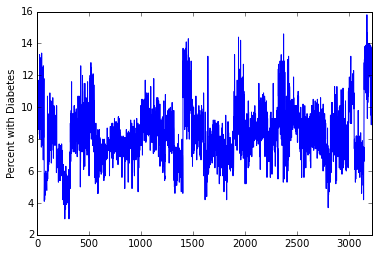

In [46]:
plot = percentDf["2004"].plot()
#plot = plot + percentDf["2012"].plot()
plot.set_ylabel("Percent with Diabetes")

In [21]:
#percentDf.columns = pd.to_datetime(percentDf.columns)

In [22]:
type(percentDf.columns[0])

str

I wanted to determine which counties/places had the greatest percent with diabetes each year. Apparently many of the counties did not keep this "greatest percent" ranking consistently:

In [23]:
for j in range(len(percentDf.columns) - 1):
    columnName = percentDf.columns[j]
    index = percentDf[columnName].idxmax()
    county = percentDf["County"][index]
    print columnName + " " + str(index) + " " + county

2004 3174 Gu�nica Municipio
2005 3174 Gu�nica Municipio
2006 3205 Rinc�n Municipio
2007 3205 Rinc�n Municipio
2008 31 Greene County
2009 52 Perry County
2010 31 Greene County
2011 42 Lowndes County
2012 42 Lowndes County
delta 42 Lowndes County


Lowndes County had the greatest change over time at 11.1%:

In [24]:
percentDf["delta"][42]

11.1

I did the same thing for the counties with lowest percent with diabetes each year:

In [47]:
for j in range(len(percentDf.columns) - 1):
    columnName = percentDf.columns[j]
    index = percentDf[columnName].idxmin()
    county = percentDf["County"][index]
    print columnName + " " + str(index) + " " + county

2004 266 Eagle County
2005 266 Eagle County
2006 265 Douglas County
2007 266 Eagle County
2008 266 Eagle County
2009 266 Eagle County
2010 301 Routt County
2011 301 Routt County
2012 266 Eagle County
delta 1068 McCracken County


McCracken County had the lowest change over time with a reduction of 1.1%:

In [26]:
percentDf["delta"][1068]

-1.0999999999999996

####Goals: 
- Create a Time Series with these counties that have had the highest rate or lowest rate at any time: 3174, 3205, 31, 52, 42, 266, 265, 301, and 1068.

I created a method to take in an index of a county then return all subsequent percentages (this was poorly coded and I definitely should have iterated through or used one of panda's functions, sorry).

In [27]:
def extractColumns(index):
    infolist = []
    #infolist.append(percentDf["County"][index])
    infolist.append(percentDf["2004"][index]) 
    infolist.append(percentDf["2005"][index]) 
    infolist.append(percentDf["2006"][index]) 
    infolist.append(percentDf["2007"][index]) 
    infolist.append(percentDf["2008"][index]) 
    infolist.append(percentDf["2009"][index]) 
    infolist.append(percentDf["2010"][index]) 
    infolist.append(percentDf["2011"][index]) 
    infolist.append(percentDf["2012"][index])
    print infolist
    return infolist

def getCounty(index):
    return percentDf["County"][index]

extractColumns(3174)

[15.8, 17.7, 16.3, 16.2, 15.4, 15.2, 16.4, 17.2, 18.8]


[15.8, 17.7, 16.3, 16.2, 15.4, 15.2, 16.4, 17.2, 18.8]

I needed the names of the counties which I used to create my new, narrower DataFrame below.

In [28]:
print "3174" + getCounty(3174)
print "3205" + getCounty(3205)
print "31" + getCounty(31)
print "52" + getCounty(52)
print "42" + getCounty(42)
print "266" + getCounty(266)
print "265" + getCounty(265)
print "301" + getCounty(301)
print "1068" + getCounty(1068)

3174Gu�nica Municipio
3205Rinc�n Municipio
31Greene County
52Perry County
42Lowndes County
266Eagle County
265Douglas County
301Routt County
1068McCracken County


DataFrame with these new points:

In [29]:
data = {"GuanicaMunicipio": extractColumns(3174), 'RinconMunicipio': extractColumns(3205),
        'GreeneCounty': extractColumns(31),'PerryCounty': extractColumns(52),
        'LowndesCounty': extractColumns(42), 'EagleCounty': extractColumns(266),
        'DouglasCounty': extractColumns(265), 'RouttCounty': extractColumns(301),
        'McCrackenCounty': extractColumns(1068)}

smallDf = pd.DataFrame(data)
smallDf

[15.8, 17.7, 16.3, 16.2, 15.4, 15.2, 16.4, 17.2, 18.8]
[12.6, 15.0, 17.5, 18.6, 17.4, 17.0, 18.2, 17.3, 17.7]
[13.1, 13.2, 15.4, 17.4, 18.2, 18.8, 19.4, 18.8, 21.0]
[12.5, 13.0, 14.4, 17.0, 17.5, 19.8, 18.2, 17.6, 17.9]
[12.4, 12.4, 14.7, 16.4, 17.1, 18.5, 19.3, 21.6, 23.5]
[3.0, 3.0, 3.2, 3.2, 3.0, 3.2, 3.6, 4.1, 3.6]
[3.3, 3.5, 3.1, 3.6, 3.4, 4.1, 4.1, 4.5, 4.8]
[3.7, 3.4, 3.6, 3.9, 3.4, 3.4, 3.3, 3.9, 4.0]
[10.9, 10.0, 10.7, 10.9, 11.6, 11.1, 10.4, 10.0, 9.8]


,DouglasCounty,EagleCounty,GreeneCounty,GuanicaMunicipio,LowndesCounty,McCrackenCounty,PerryCounty,RinconMunicipio,RouttCounty
0,3.3,3.0,13.1,15.8,12.4,10.9,12.5,12.6,3.7
1,3.5,3.0,13.2,17.7,12.4,10.0,13.0,15.0,3.4
2,3.1,3.2,15.4,16.3,14.7,10.7,14.4,17.5,3.6
3,3.6,3.2,17.4,16.2,16.4,10.9,17.0,18.6,3.9
4,3.4,3.0,18.2,15.4,17.1,11.6,17.5,17.4,3.4
5,4.1,3.2,18.8,15.2,18.5,11.1,19.8,17.0,3.4
6,4.1,3.6,19.4,16.4,19.3,10.4,18.2,18.2,3.3
7,4.5,4.1,18.8,17.2,21.6,10.0,17.6,17.3,3.9
8,4.8,3.6,21.0,18.8,23.5,9.8,17.9,17.7,4.0


In [30]:
indexes = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
indexes = pd.Series(indexes)
smallDf.rename(indexes, inplace=True)

In [31]:
smallDf.head()

,DouglasCounty,EagleCounty,GreeneCounty,GuanicaMunicipio,LowndesCounty,McCrackenCounty,PerryCounty,RinconMunicipio,RouttCounty
2004,3.3,3.0,13.1,15.8,12.4,10.9,12.5,12.6,3.7
2005,3.5,3.0,13.2,17.7,12.4,10.0,13.0,15.0,3.4
2006,3.1,3.2,15.4,16.3,14.7,10.7,14.4,17.5,3.6
2007,3.6,3.2,17.4,16.2,16.4,10.9,17.0,18.6,3.9
2008,3.4,3.0,18.2,15.4,17.1,11.6,17.5,17.4,3.4


In [32]:
smallDf.index

Int64Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012], dtype='int64')

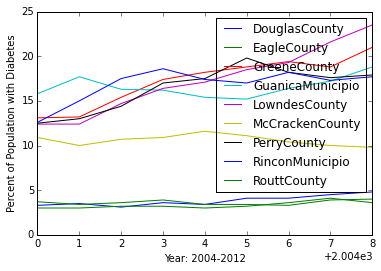

In [33]:
x = smallDf.index
plot = smallDf.plot(x = x)
plot.set_ylabel("Percent of Population with Diabetes")
plot.set_xlabel("Year: 2004-2012")

### Same Analysis on Alabama Data
Since Alabama had the highest variance per state, we did a more thorough analysis on just Alabama.

In [34]:
aldata = pd.read_csv("alabamaData.csv")
alabamaDf = pd.DataFrame(data)

In [35]:
alPercentData = {"County": df["County"], "2004": df["2004percent"], "2005": df["2005percent"], "2006": df["2006percent"],
               "2007": df["2007percent"], "2008": df["2008percent"], "2009": df["2009percent"],
               "2010": df["2010percent"], "2011": df["2011percent"], "2012": df["2012percent"]}
alPercentDf = pd.DataFrame(alPercentData)
alPercentDf.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,County
0,10,11.1,11.4,11.4,11.4,12.3,11.8,12.1,12,Autauga County
1,8.1,8.4,9.1,9.4,9.8,11.4,11.8,11.5,10.8,Baldwin County
2,10.1,10.7,12.4,13,13.6,14,14.2,14.8,16.2,Barbour County
3,8.9,9.4,10.9,11.6,11.1,11.8,11.1,12.7,13.2,Bibb County
4,8.3,8.6,9.6,10.5,11.4,12.6,14,13.2,13.8,Blount County


In [36]:
def convertToInt():
    for j in range(len(alPercentDf.columns)):
        columnName = alPercentDf.columns[j]
        if (columnName != 'County'):
            for i in range(len(alPercentDf)):
                if (alPercentDf[columnName][i] != "No Data"):
                    alPercentDf[columnName][i] = float(alPercentDf[columnName][i])
                else:
                    alPercentDf[columnName][i] = None
convertToInt()

In [37]:
alPercentDf.dropna().head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,County
0,10,11.1,11.4,11.4,11.4,12.3,11.8,12.1,12,Autauga County
1,8.1,8.4,9.1,9.4,9.8,11.4,11.8,11.5,10.8,Baldwin County
2,10.1,10.7,12.4,13,13.6,14,14.2,14.8,16.2,Barbour County
3,8.9,9.4,10.9,11.6,11.1,11.8,11.1,12.7,13.2,Bibb County
4,8.3,8.6,9.6,10.5,11.4,12.6,14,13.2,13.8,Blount County


In [38]:
for j in range(len(alPercentDf.columns) - 1):
    columnName = alPercentDf.columns[j]
    index = alPercentDf[columnName].idxmax()
    county = alPercentDf["County"][index]
    print columnName + " " + str(index) + " " + county

2004 3174 Gu�nica Municipio
2005 3174 Gu�nica Municipio
2006 3205 Rinc�n Municipio
2007 3205 Rinc�n Municipio
2008 31 Greene County
2009 52 Perry County
2010 31 Greene County
2011 42 Lowndes County
2012 42 Lowndes County


In [39]:
for j in range(len(alPercentDf.columns) - 1):
    columnName = alPercentDf.columns[j]
    index = alPercentDf[columnName].idxmin()
    county = alPercentDf["County"][index]
    print columnName + " " + str(index) + " " + county

2004 266 Eagle County
2005 266 Eagle County
2006 265 Douglas County
2007 266 Eagle County
2008 266 Eagle County
2009 266 Eagle County
2010 301 Routt County
2011 301 Routt County
2012 266 Eagle County


In [40]:
def extractColumns(index):
    infolist = []
    #infolist.append(percentDf["County"][index])
    infolist.append(alPercentDf["2004"][index]) 
    infolist.append(alPercentDf["2005"][index]) 
    infolist.append(alPercentDf["2006"][index]) 
    infolist.append(alPercentDf["2007"][index]) 
    infolist.append(alPercentDf["2008"][index]) 
    infolist.append(alPercentDf["2009"][index]) 
    infolist.append(alPercentDf["2010"][index]) 
    infolist.append(alPercentDf["2011"][index]) 
    infolist.append(alPercentDf["2012"][index])
    print infolist
    return infolist

def getCounty(index):
    return alPercentDf["County"][index]

In [41]:
print "58" + getCounty(58)
print "42" + getCounty(42)
print "31" + getCounty(31)
print "52" + getCounty(52)
print "43" + getCounty(43)

58Shelby County
42Lowndes County
31Greene County
52Perry County
43Macon County


In [42]:
data = {"ShelbyCounty": extractColumns(58), 'LowndesCounty': extractColumns(42),
        'GreeneCounty': extractColumns(31),'PerryCounty': extractColumns(52),
        'MaconCounty': extractColumns(43)}

smallDf = pd.DataFrame(data)
smallDf

[6.7, 7.2, 7.5, 7.4, 8.0, 8.2, 8.9, 8.5, 8.6]
[12.4, 12.4, 14.7, 16.4, 17.1, 18.5, 19.3, 21.6, 23.5]
[13.1, 13.2, 15.4, 17.4, 18.2, 18.8, 19.4, 18.8, 21.0]
[12.5, 13.0, 14.4, 17.0, 17.5, 19.8, 18.2, 17.6, 17.9]
[13.4, 13.7, 15.4, 15.2, 16.2, 15.6, 16.6, 17.0, 17.8]


,GreeneCounty,LowndesCounty,MaconCounty,PerryCounty,ShelbyCounty
0,13.1,12.4,13.4,12.5,6.7
1,13.2,12.4,13.7,13.0,7.2
2,15.4,14.7,15.4,14.4,7.5
3,17.4,16.4,15.2,17.0,7.4
4,18.2,17.1,16.2,17.5,8.0
5,18.8,18.5,15.6,19.8,8.2
6,19.4,19.3,16.6,18.2,8.9
7,18.8,21.6,17.0,17.6,8.5
8,21.0,23.5,17.8,17.9,8.6


In [43]:
indexes = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
indexes = pd.Series(indexes)
smallDf.rename(indexes, inplace=True)

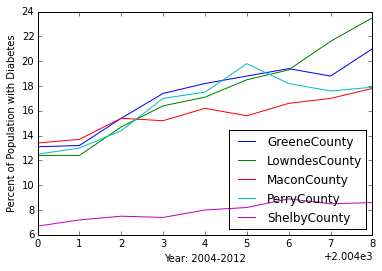

In [44]:
plot = smallDf.plot()
plot.set_ylabel("Percent of Population with Diabetes")
plot.set_xlabel("Year: 2004-2012")